## Module 1

In [1]:
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

#### Query 1

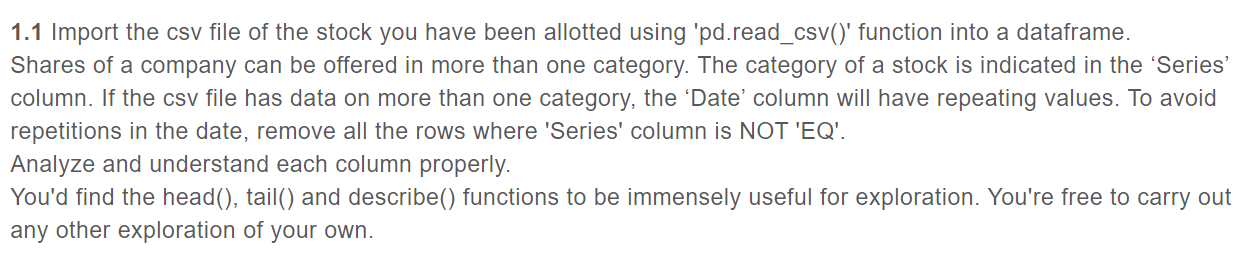

In [2]:
df=pd.read_csv("AAPL.csv")

In [3]:
df.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",243.58,244.66,244.75,241.81,17.92M
1,"Oct 23, 2019",243.18,242.10,243.24,241.22,19.93M
2,"Oct 22, 2019",239.96,241.16,242.20,239.62,22.68M
3,"Oct 21, 2019",240.51,237.52,240.99,237.32,22.37M
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M


In [4]:
#We have no Series column in our dataset so we skip that step here and continue with our exploration

In [5]:
df.tail()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
498,"Oct 31, 2017",169.04,167.90,169.65,166.94,36.05M
499,"Oct 30, 2017",166.72,163.89,168.07,163.72,44.70M
500,"Oct 27, 2017",163.05,159.29,163.60,158.70,44.45M
501,"Oct 26, 2017",157.41,157.23,157.83,156.78,17.00M
502,"Oct 25, 2017",156.41,156.91,157.55,155.27,21.21M


In [6]:
df.describe()

,Close Price,Open Price,High Price,Low Price
count,503.000000,503.000000,503.000000,503.000000
mean,189.891670,189.787217,191.627137,188.084076
std,21.231769,21.198211,21.340226,21.131357
min,142.190000,143.980000,145.720000,142.000000
25%,172.980000,173.020000,174.525000,171.715000
50%,187.900000,187.720000,189.220000,186.020000
75%,207.065000,205.925000,208.095000,203.950000
max,243.580000,244.660000,244.750000,241.810000


In [7]:
df['Date']

0      Oct 24, 2019
1      Oct 23, 2019
2      Oct 22, 2019
3      Oct 21, 2019
4      Oct 18, 2019
           ...     
498    Oct 31, 2017
499    Oct 30, 2017
500    Oct 27, 2017
501    Oct 26, 2017
502    Oct 25, 2017
Name: Date, Length: 503, dtype: object

#### Query 2

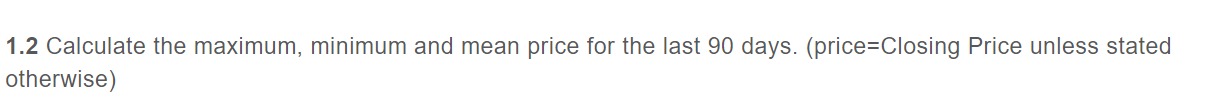

In [8]:
# for last 90 days we take 90 from end

In [9]:
df['Close Price'].tail(90).max()

179.26

In [10]:
df['Close Price'].tail(90).mean()

171.27711111111105

In [11]:
df['Close Price'].tail(90).min()

155.15

#### Query 3

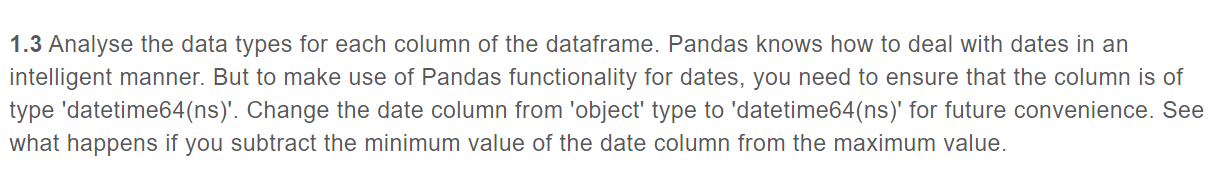

In [12]:
df['Date'].dtypes

dtype('O')

In [13]:
df['Date']= pd.to_datetime(df['Date']) 

In [14]:
df.dtypes

Date                     datetime64[ns]
Close Price                     float64
Open Price                      float64
High Price                      float64
Low Price                       float64
Total Traded Quantity            object
dtype: object

In [15]:
df['Date'].max()-df['Date'].min()

Timedelta('729 days 00:00:00')

#### Query 4

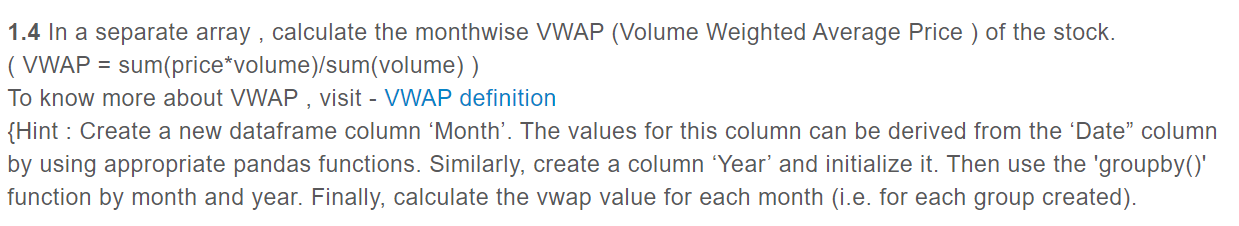

In [16]:
df['Date'].head()

0   2019-10-24
1   2019-10-23
2   2019-10-22
3   2019-10-21
4   2019-10-18
Name: Date, dtype: datetime64[ns]

In [17]:
df.dtypes

Date                     datetime64[ns]
Close Price                     float64
Open Price                      float64
High Price                      float64
Low Price                       float64
Total Traded Quantity            object
dtype: object

we wont be ableto apply any operations on object datatype so we convert it into float.And occurence of 'M' is throughout the coloumn so multipying 10^6

In [18]:
def extract(temp):
    temp=str(temp)
    return temp[0:5]
for i in range (0,503):
    df['Total Traded Quantity'][i]=extract(df['Total Traded Quantity'][i])
    
    
df['Total Traded Quantity']=df['Total Traded Quantity'].astype('float').apply(lambda x: x*1000000)

In [19]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year']=pd.DatetimeIndex(df['Date']).year

In [20]:
df['VWAP'] = (df['Close Price'] * df['Total Traded Quantity']).cumsum() / df['Total Traded Quantity'].fillna(0).cumsum()
df_vwap = df[['Month','Year','VWAP']]
group = df_vwap.groupby(['Month','Year'])
group.first()

VWAP
Month Year            
1     2018  190.308770
      2019  199.282180
2     2018  192.090817
      2019  202.229340
3     2018  193.121827
      2019  205.287030
4     2018  194.497923
      2019  206.048414
5     2018  195.205133
      2019  209.582352
6     2018  195.554529
      2019  213.878985
7     2018  195.761774
      2019  216.217012
8     2018  194.628612
      2019  224.028662
9     2018  192.407190
      2019  230.762173
10    2017  188.270523
      2018  189.639128
      2019  243.580000
11    2017  188.917639
      2018  189.053499
12    2017  189.558167
      2018  192.865122

#### Query 5

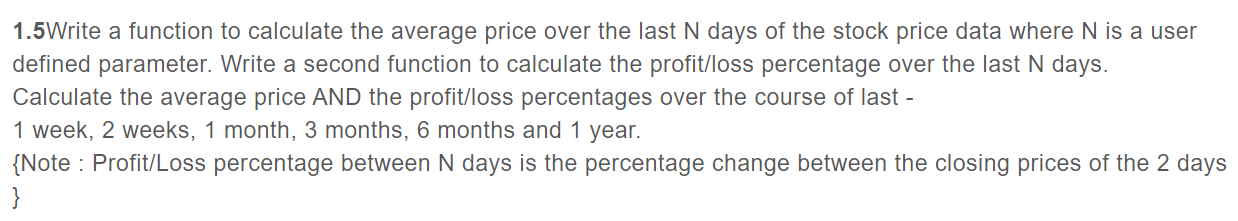

In [21]:
df['Average Price']=df['Close Price']+df['High Price']+ df['Low Price']/3
df.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Average Price
0,2019-10-24,243.58,244.66,244.75,241.81,17920000.0,10,2019,243.580000,568.933333
1,2019-10-23,243.18,242.10,243.24,241.22,19930000.0,10,2019,243.369379,566.826667
2,2019-10-22,239.96,241.16,242.20,239.62,22680000.0,10,2019,242.091918,562.033333
3,2019-10-21,240.51,237.52,240.99,237.32,22370000.0,10,2019,241.665048,560.606667
4,2019-10-18,236.41,234.59,237.58,234.29,24380000.0,10,2019,240.470808,552.086667


In [22]:
# N is the number of days
def avg_price(N):
    return (df['Average Price'].tail(N).sum())/N

print("Average prices for last N days are as follows:")
print("Loss/Profit percentage for last N days are as follows:")
print("Last 1 week     :  ",avg_price(5))
print("Last 2 weeks   :  ",avg_price(10))
print("Last 1 month   :  ",avg_price(20))
print("Last 3 months :  ",avg_price(60))
print("Last 6 months :  ",avg_price(120))
print("Last 1 year      :  ",avg_price(240))


Average prices for last N days are as follows:
Loss/Profit percentage for last N days are as follows:
Last 1 week     :   379.29333333333335
Last 2 weeks   :   389.841
Last 1 month   :   396.4575
Last 3 months :   402.1892777777778
Last 6 months :   401.9220277777778
Last 1 year      :   433.33700000000005


In [23]:
def profit_loss(N):
    difference = (df['Close Price'].tail(N).iloc[N-1] - df['Close Price'].tail(N).iloc[0])
    if difference < 0 :
        loss = -(difference)
        percent_loss = (loss/df['Close Price'].tail(N).iloc[N-1])*100
        return percent_loss
    if difference > 0 :
        profit = difference
        percent_profit = (profit/df['Close Price'].tail(N).iloc[N-1])*100
        return percent_profit

print("Loss/Profit percentage for last N days are as follows:")
print("Last 1 week     :  ",profit_loss(5))
print("Last 2 weeks   :  ",profit_loss(10))
print("Last 1 month   :  ",profit_loss(20))
print("Last 3 months :  ",profit_loss(60))
print("Last 6 months :  ",profit_loss(120))
print("Last 1 year      :  ",profit_loss(240))

Loss/Profit percentage for last N days are as follows:
Last 1 week     :   8.07493127037913
Last 2 weeks   :   11.76395371139953
Last 1 month   :   10.696247043027933
Last 3 months :   13.164119941180234
Last 6 months :   13.70117000191804
Last 1 year      :   43.06630010868871


#### Query 6

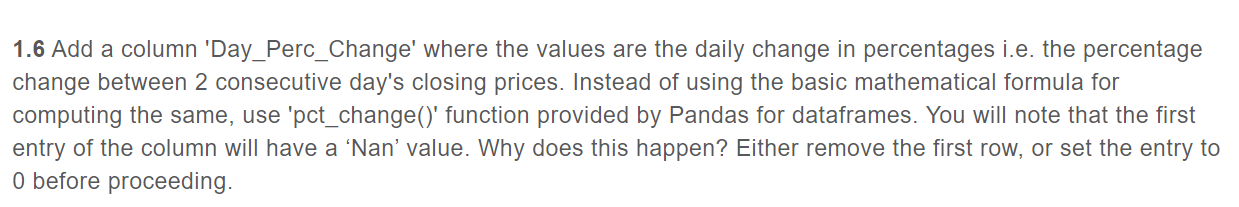

In [24]:
df['Day_Perc_Change'] = df['Close Price'].pct_change().fillna(0)
df.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Average Price,Day_Perc_Change
0,2019-10-24,243.58,244.66,244.75,241.81,17920000.0,10,2019,243.580000,568.933333,0.000000
1,2019-10-23,243.18,242.10,243.24,241.22,19930000.0,10,2019,243.369379,566.826667,-0.001642
2,2019-10-22,239.96,241.16,242.20,239.62,22680000.0,10,2019,242.091918,562.033333,-0.013241
3,2019-10-21,240.51,237.52,240.99,237.32,22370000.0,10,2019,241.665048,560.606667,0.002292
4,2019-10-18,236.41,234.59,237.58,234.29,24380000.0,10,2019,240.470808,552.086667,-0.017047


#### Query 7

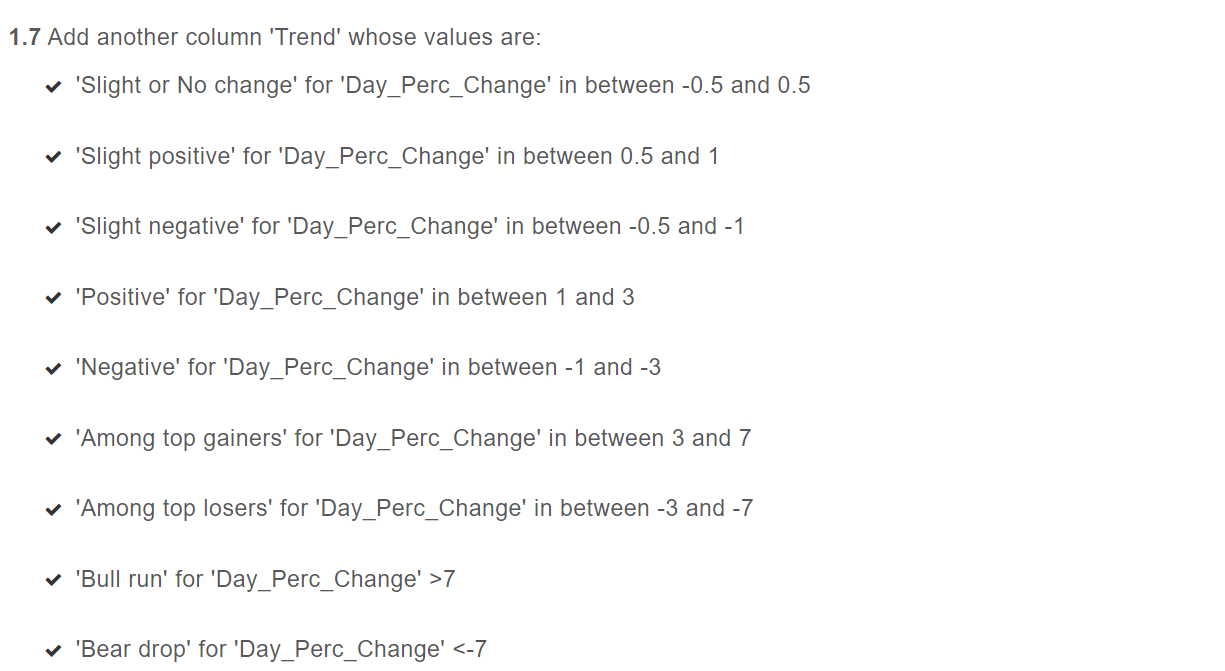

In [25]:
if ((df['Day_Perc_Change'] >= -0.5) & (df['Day_Perc_Change'] <= 0.5)).all():
    df['Trend']='Slight or No Change'
elif ((df['Day_Perc_Change'] >= 0.5) & (df['Day_Perc_Change'] <= 1)).all():
    df['Trend'] = 'Slight positive'
elif ((df['Day_Perc_Change'] <= -0.5) & (df['Day_Perc_Change'] >= -1)).all():
    df['Trend'] = 'Slight negative'
elif ((df['Day_Perc_Change'] >= 1) & (df['Day_Perc_Change'] <= 3)).all():
    df['Trend'] = 'Positive' 
elif ((df['Day_Perc_Change'] <= -1) & (df['Day_Perc_Change'] >= -3)).all():
    df['Trend'] = 'Negative'
elif ((df['Day_Perc_Change'] >= 3) & (df['Day_Perc_Change'] <= 7)).all():
    df['Trend'] = 'Among top gainers'
elif ((df['Day_Perc_Change'] <= -3) & (df['Day_Perc_Change'] >= -7)).all():
    df['Trend'] = 'Among top losers'
elif (df['Day_Perc_Change'] > 7).all():
    df['Trend'] = 'Bull run' 
elif (df['Day_Perc_Change'] < -7).all():
    df['Trend'] = 'Bear drop' 

In [26]:
df

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Average Price,Day_Perc_Change,Trend
0,2019-10-24,243.58,244.66,244.75,241.81,17920000.0,10,2019,243.580000,568.933333,0.000000,Slight or No Change
1,2019-10-23,243.18,242.10,243.24,241.22,19930000.0,10,2019,243.369379,566.826667,-0.001642,Slight or No Change
2,2019-10-22,239.96,241.16,242.20,239.62,22680000.0,10,2019,242.091918,562.033333,-0.013241,Slight or No Change
3,2019-10-21,240.51,237.52,240.99,237.32,22370000.0,10,2019,241.665048,560.606667,0.002292,Slight or No Change
4,2019-10-18,236.41,234.59,237.58,234.29,24380000.0,10,2019,240.470808,552.086667,-0.017047,Slight or No Change
...,...,...,...,...,...,...,...,...,...,...,...,...
498,2017-10-31,169.04,167.90,169.65,166.94,36050000.0,10,2017,188.270523,394.336667,0.012883,Slight or No Change
499,2017-10-30,166.72,163.89,168.07,163.72,44700000.0,10,2017,188.208961,389.363333,-0.013725,Slight or No Change
500,2017-10-27,163.05,159.29,163.60,158.70,44450000.0,10,2017,188.137696,379.550000,-0.022013,Slight or No Change
501,2017-10-26,157.41,157.23,157.83,156.78,17000000.0,10,2017,188.104443,367.500000,-0.034591,Slight or No Change


#### Query 8

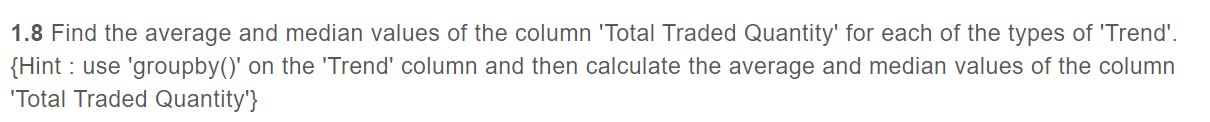

In [27]:
print("Mean of Total Traded Quantity by Trend: ")
df.groupby(df.Trend).mean()['Total Traded Quantity']

Mean of Total Traded Quantity by Trend: 


Trend
Slight or No Change    3.127334e+07
Name: Total Traded Quantity, dtype: float64

In [28]:
print("Median of Total Traded Quantity by Trend: ")
df.groupby(df.Trend).median()['Total Traded Quantity']

Median of Total Traded Quantity by Trend: 


Trend
Slight or No Change    27960000.0
Name: Total Traded Quantity, dtype: float64

#### Query 9

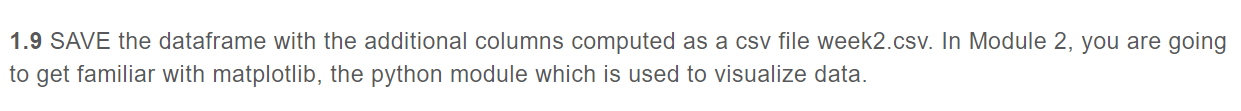

In [29]:
df.to_csv('Module1Solutions.csv')